In [1]:
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.3)
tf.config.gpu.set_per_process_memory_growth(True)

In [2]:
# Loading data for x-ray images
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize




img_w, img_h = 128, 128                                 # Setting the width and heights of the images
data_path =  '/Lab1/X_ray/'          # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, l1, l2, l3, l4, l5, l6, l7, l8, l9):
        if l1 in im_name:
            Label = np.array([0])
        elif l2 in im_name:
            Label = np.array([1])
        elif l3 in im_name:
            Label = np.array([2])
        elif l4 in im_name:
            Label = np.array([3])
        elif l5 in im_name:
            Label = np.array([4])
        elif l6 in im_name:
            Label = np.array([5])
        elif l7 in im_name:
            Label = np.array([6])
        elif l8 in im_name:
            Label = np.array([7])
        elif l9 in im_name:
            Label = np.array([8])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/5780  of train images
Reading: 200/5780  of train images
Reading: 400/5780  of train images
Reading: 600/5780  of train images
Reading: 800/5780  of train images
Reading: 1000/5780  of train images
Reading: 1200/5780  of train images
Reading: 1400/5780  of train images
Reading: 1600/5780  of train images
Reading: 1800/5780  of train images
Reading: 2000/5780  of train images
Reading: 2200/5780  of train images
Reading: 2400/5780  of train images
Reading: 2600/5780  of train images
Reading: 2800/5780  of train images
Reading: 3000/5780  of train images
Reading: 3200/5780  of train images
Reading: 3400/5780  of train images
Reading: 3600/5780  of train images
Reading: 3800/5780  of train images
Reading: 4000/5780  of train images
Reading: 4200/5780  of train images
Reading: 4400/5780  of train images
Reading: 4600/5780  of train images
Reading: 4800/5780  of train images
Reading: 5000/5780  of train images
Reading: 5200/5780  of train images
Reading: 5400/5780  of train images

In [3]:
tf.keras.utils.to_categorical(y_test,num_classes=None,dtype='float32')
tf.keras.utils.to_categorical(y_train,num_classes=None,dtype='float32')



array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# LeNet Model for x-ray images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Base = 16
LR = 0.00001

def model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    return model

Model=model(1,128,128)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1048608   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Train on 5780 samples, validate on 450 samples
Epoch 1/50
5780/5780 [==============================] - 2s 409us/sample - loss: 0.4901 - accuracy: 0.8358 - val_loss: 0.4422 - val_accuracy: 0.8844
Epoch 2/50
5780/5780 [==============================] - 2s 377us/sample - loss: 0.1932 - accuracy: 0.9317 - val_loss: 0.3260 - val_accuracy: 0.8933
Epoch 3/50
5780/5780 [==============================] - 2s 343us/sample - loss: 0.1429 - accuracy: 0.9491 - val_loss: 0.3188 - val_accuracy: 0.9156
Epoch 4/50
5780/5780 [==============================] - 2s 372us/sample - loss: 0.1278 - accuracy: 0.9543 - val_loss: 0.3815 - val_accuracy: 0.8867
Epoch 5/50
5780/5780 [==============================] - 2s 366us/sample - loss: 0.1110 - accuracy: 0.9600 - val_loss: 0.3495 - val_accuracy: 0.9000
Epoch 6/50
5780/5780 [==============================] - 2s 374us/sample - loss: 0.0889 - accuracy: 0.9651 - val_loss: 0.2855 - val_accuracy: 0.9222
Epoch 7/50
5780/5780 [==============================] - 2s 367us/

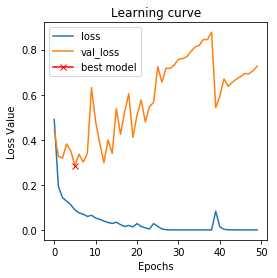

In [9]:
n_epochs = 50
Batch_Size = 16

Model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


History = Model.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 


In [ ]:
#AlexNet for x-ray images
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

Base = 2
LR = 0.01
def model(img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()   
    return model
Model=model(1,128,128)

In [ ]:
n_epochs = 50
Batch_Size = 8

Model.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(LR),metrics=['accuracy'])


History = Model.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

In [ ]:
#VGG for xray images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
input_shape = (128, 128, 1)

#Instantiate an empty model
Base = 8

def model(img_ch, img_width, img_height):
    
    model = Sequential([
    Conv2D(Base, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(Base, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same'),
    Conv2D(Base*2, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*4, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    Conv2D(Base*8, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='softmax')
    ])
    model.summary()   
    return model
Model=model(1,128,128)

In [ ]:
# Compile the model
n_epochs = 50
Batch_Size = 8
Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
History = Model.fit(x_train, y_train, batch_size = Batch_Size, epochs= n_epochs, verbose=1, validation_data=(x_test,y_test))
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();